***
# <font color=green size=10>**1ª ENTREGA DO PROJETO DATA SCIENCE APLICADO À SAÚDE**</font>
***

**>> Nome completo dos integrantes da equipe**

*Ammabel Costa Lopes e Andreza Oliveira Gonçalves*


**>> Tema do projeto**

Análise Preditiva do Risco Neonatal nos Primeiros Minutos de Vida


**>> Banco de dados consultado**

Sistema de Informação sobre Nascidos Vivos - Sinasc dos anos de 2020 e 2023. https://opendatasus.saude.gov.br/dataset/sistema-de-informacao-sobre-nascidos-vivos-sinasc/resource/2b5225fd-520d-4e5b-92e8-d7c801d16090


**>> Banco de dados utilizado**

*Informe o link do banco de dados que você pré-processou e efetivamente utilizou. Salve o banco pré-processado em csv e coloque numa nuvem para poder gerar um link. Cuide que este link não demande autorização para que seja possível acessá-lo.*
https://drive.google.com/file/d/1GcpLgvhDCqw7bPZ4Eps8v0YQzjRzhyoW/view?usp=sharing
https://drive.google.com/file/d/1CFZbXKS2izZEb3rDYRkeDYhdEcNhpEd7/view?usp=sharing

## <font color=green size=6>**Desenvolvimento do projeto**</font>

**>> Problema a ser solucionado**

Nosso modelo pode prever o índice de Apgar nos primeiros minutos de vida, ajudando médicos a identificar recém-nascidos de risco com base nos dados maternos e do parto.


### **01. Importação de bibliotecas necessárias para o projeto.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as pyplot
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import seaborn as sns
from seaborn import heatmap
import plotly.express as px

### **02. Importação do banco de dados original.**

In [ ]:
#Criamos um arquivo csv com número reduzidos de linhas para facilitar o processamento, pois se trata de dois banco de dados.
#O link acima aponta para estes já reduzidos para 2000 linhas, "amostra2020" e "amostra2023".

In [ ]:
#Cria dataframe de dados 2020
dados2020 = pd.read_csv('/content/amostra2020.csv', sep= ';', on_bad_lines='skip')

<ipython-input-4-1f97a81d2228>:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  dados2020 = pd.read_csv('/content/amostra2020.csv', sep= ';', on_bad_lines='skip')


In [ ]:
#Cria dataframe de dados 2023
dados2023 = pd.read_csv('/content/amostra2023.csv', sep= ';', on_bad_lines='skip')

<ipython-input-5-f612e096de53>:2: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  dados2023 = pd.read_csv('/content/amostra2023.csv', sep= ';', on_bad_lines='skip')


### **03. Pré-processamento dos dados para produzir o banco de dados para análise exploratória.**

In [ ]:
# Recomendamos que a equipe divida em várias células de código cada etapa do
# processamento e que utilize comentários para descrever cada etapa.

In [ ]:
#Retirando colunas que não serão utilizadas
dados2020 = dados2020.drop(columns=['CONTADOR', 'ORIGEM', 'TPDOCRESP', 'HORANASC', 'CONSULTAS', 'DTCADASTRO', 'APGAR1', 'CODESTAB', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'CODMUNRES', 'SEXO', 'RACACOR', 'PESO', 'CODANOMAL', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNNOVA', 'CODPAISRES', 'KOTELCHUCK', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA','DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'IDADEPAI', 'SEMAGESTAC', 'TPMETESTIM', 'TPAPRESENT', 'STTRABPART', 'TPNASCASSI', 'TPFUNCRESP', 'STDNEPIDEM', 'DTULTMENST', 'TPROBSON' ])

In [ ]:
#Retirando colunas que não serão utilizadas
dados2023 = dados2023.drop(columns=['contador', 'ORIGEM', 'TPDOCRESP', 'HORANASC', 'CONSULTAS', 'DTCADASTRO', 'APGAR1', 'CODESTAB', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'CODMUNRES', 'SEXO', 'RACACOR', 'PESO', 'CODANOMAL', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNNOVA', 'CODPAISRES', 'KOTELCHUCK', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA','DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'IDADEPAI', 'SEMAGESTAC', 'TPMETESTIM', 'TPAPRESENT', 'STTRABPART', 'TPNASCASSI', 'TPFUNCRESP', 'STDNEPIDEM', 'DTULTMENST', 'TPROBSON', 'OPORT_DN'])

In [ ]:
# Substitui NaN por 0
dados2020 = dados2020.fillna(0)
dados2023 = dados2023.fillna(0)

In [ ]:
#Renomeando colunas 2020
dados2020 = dados2020.rename(columns={
    "CODMUNNASC": "codigo_municipio_nascimento",
    "LOCNASC": "local_nascimento",
    "DTNASC": "data_nascimento",
    "IDADEMAE": "idade_mae",
    "QTDFILVIVO": "qtd_filhos_vivos",
    "QTDFILMORT": "qtd_filhos_mortos",
    "GESTACAO": "tempo_gestacao",
    "GRAVIDEZ": "tipo_gravidez",
    "PARTO": "tipo_parto",
    "APGAR5": "apgar_5_minuto",
    "IDANOMAL": "indicador_anomalia",
    "QTDGESTANT": "qtd_gestacoes",
    "QTDPARTNOR": "qtd_partos_normais",
    "QTDPARTCES": "qtd_partos_cesarea",
    "CONSPRENAT": "consultas_prenatais",
    "MESPRENAT": "mes_inicio_prenatal",
    "STCESPARTO": "cesarea_eletiva",
    "PARIDADE": "paridade",
})

In [ ]:
#Renomeando colunas 2023
dados2023 = dados2023.rename(columns={
    "CODMUNNASC": "codigo_municipio_nascimento",
    "LOCNASC": "local_nascimento",
    "DTNASC": "data_nascimento",
    "IDADEMAE": "idade_mae",
    "QTDFILVIVO": "qtd_filhos_vivos",
    "QTDFILMORT": "qtd_filhos_mortos",
    "GESTACAO": "tempo_gestacao",
    "GRAVIDEZ": "tipo_gravidez",
    "PARTO": "tipo_parto",
    "APGAR5": "apgar_5_minuto",
    "IDANOMAL": "indicador_anomalia",
    "QTDGESTANT": "qtd_gestacoes",
    "QTDPARTNOR": "qtd_partos_normais",
    "QTDPARTCES": "qtd_partos_cesarea",
    "CONSPRENAT": "consultas_prenatais",
    "MESPRENAT": "mes_inicio_prenatal",
    "STCESPARTO": "cesarea_eletiva",
    "PARIDADE": "paridade",
})

In [ ]:
dados2020.head()

,codigo_municipio_nascimento,local_nascimento,idade_mae,qtd_filhos_vivos,qtd_filhos_mortos,tempo_gestacao,tipo_gravidez,tipo_parto,data_nascimento,apgar_5_minuto,indicador_anomalia,qtd_gestacoes,qtd_partos_normais,qtd_partos_cesarea,consultas_prenatais,mes_inicio_prenatal,cesarea_eletiva,paridade
0,140010,1,30.0,0.0,0.0,5.0,1.0,1.0,3112020,10.0,2.0,0.0,0.0,0.0,10.0,0.0,3.0,0
1,140010,1,19.0,1.0,0.0,5.0,1.0,1.0,13072020,10.0,2.0,1.0,0.0,1.0,8.0,2.0,3.0,1
2,354020,1,33.0,1.0,1.0,5.0,1.0,2.0,4022020,10.0,2.0,2.0,0.0,1.0,10.0,3.0,1.0,1
3,231340,1,23.0,3.0,1.0,4.0,1.0,1.0,15082020,10.0,2.0,4.0,4.0,0.0,5.0,2.0,3.0,1
4,410690,1,38.0,4.0,0.0,3.0,2.0,1.0,28122020,9.0,2.0,4.0,4.0,0.0,12.0,1.0,3.0,1


### **04. Análise Exploratória de Dados.**

In [ ]:
# @title 1ª Estatística descritiva relacionada a porcentagem
#Porcentagem de partos normais e cesários de 2020
qtd_partos_normais2020 = dados2020['qtd_partos_normais'].sum()
qtd_partos_cesarea2020 = dados2020['qtd_partos_cesarea'].sum()

total_partos2020 = qtd_partos_normais2020 + qtd_partos_cesarea2020

porcentagem_partos_normais2020 = (qtd_partos_normais2020 / total_partos2020) * 100
porcentagem_partos_cesarea2020 = (qtd_partos_cesarea2020 / total_partos2020) * 100

#Porcentagem de partos normais e cesários de 2023
qtd_partos_normais2023 = dados2023['qtd_partos_normais'].sum()
qtd_partos_cesarea2023 = dados2023['qtd_partos_cesarea'].sum()

total_partos2023 = qtd_partos_normais2023 + qtd_partos_cesarea2023

porcentagem_partos_normais2023 = (qtd_partos_normais2023 / total_partos2023) * 100
porcentagem_partos_cesarea2023 = (qtd_partos_cesarea2023 / total_partos2023) * 100

print(f"A porcentagem de partos normais em 2020 é: {porcentagem_partos_normais2020:.2f}%")
print(f"A porcentagem de partos cesários em 2020 é: {porcentagem_partos_cesarea2020:.2f}%")

print(f"A porcentagem de partos normais em 2023 é: {porcentagem_partos_normais2023:.2f}%")
print(f"A porcentagem de partos cesários em 2023 é: {porcentagem_partos_cesarea2023:.2f}%")

A porcentagem de partos normais em 2020 é: 63.42%
A porcentagem de partos cesários em 2020 é: 36.58%
A porcentagem de partos normais em 2023 é: 61.72%
A porcentagem de partos cesários em 2023 é: 38.28%


In [ ]:
# @title 2ª Estatística descritiva: Média
#Média do índice de Apgar em 2020
media_apgar1 = dados2020['apgar_1_minuto'].mean()
print(f"A média do Apgar no 1º minuto de 2020 é: {media_apgar1}")

#Média do índice de Apgar em 2023
media_apgar2 = dados2023['apgar_1_minuto'].mean()
print(f"A média do Apgar no 1º minuto de 2023 é: {media_apgar2}")

A média do Apgar no 1º minuto de 2020 é: 8.31313
A média do Apgar no 1º minuto de 2023 é: 8.28972


In [ ]:
# @title 3ª Estatística descritiva: Mediana
#Mediana das idades das mães 2020
mediana_idade_mae2020 = dados2020['idade_mae'].median()
print(f"A mediana das idades das mães de 2020 é: {mediana_idade_mae2020}")

#Mediana das idades das mães 2023
mediana_idade_mae2023 = dados2023['idade_mae'].median()
print(f"A mediana das idades das mães de 2023 é: {mediana_idade_mae2023}")

A mediana das idades das mães de 2020 é: 27.0
A mediana das idades das mães de 2023 é: 27.0


In [ ]:
# @title 4ª Estatística descritiva: Porcentagem de ocorrência de locais de nascimento
#Porcentagem de ocorrência de locais de nascimento 2020
Qtd_local_hospital2020 = dados2020['local_nascimento'].value_counts().get(1, 0)
Qtd_local_outros_est2020 = dados2020['local_nascimento'].value_counts().get(2, 0)
Qtd_local_domicilio2020 = dados2020['local_nascimento'].value_counts().get(3, 0)
Qtd_local_outros2020 = dados2020['local_nascimento'].value_counts().get(4, 0)
Qtd_local_aldeia2020 = dados2020['local_nascimento'].value_counts().get(5, 0)

Qtd_local_total2020 = Qtd_local_hospital2020 + Qtd_local_outros_est2020 + Qtd_local_domicilio2020 + Qtd_local_outros2020 + Qtd_local_aldeia2020
porcentagem_local_hospital2020 = (Qtd_local_hospital2020 / Qtd_local_total2020) * 100
porcentagem_local_outros_est2020 = (Qtd_local_outros_est2020 / Qtd_local_total2020) * 100
porcentagem_local_domicilio2020 = (Qtd_local_domicilio2020 / Qtd_local_total2020) * 100
porcentagem_local_outros2020 = (Qtd_local_outros2020 / Qtd_local_total2020) * 100
porcentagem_local_aldeia2020 = (Qtd_local_aldeia2020 / Qtd_local_total2020) * 100

#Exibir resultados
print("Porcentagem de ocorrências por local de nascimento em 2020:")
print(f"Hospital: {porcentagem_local_hospital2020:.2f}%")
print(f"Outros estabelecimentos de saúde: {porcentagem_local_outros_est2020:.2f}%")
print(f"Domicílio: {porcentagem_local_domicilio2020:.2f}%")
print(f"Outros locais: {porcentagem_local_outros2020:.2f}%")
print(f"Aldeia indígena: {porcentagem_local_aldeia2020:.2f}%")

Porcentagem de ocorrências por local de nascimento em 2020:
Hospital: 98.36%
Outros estabelecimentos de saúde: 0.62%
Domicílio: 0.74%
Outros locais: 0.22%
Aldeia indígena: 0.07%


In [ ]:
#Porcentagem de ocorrência de locais de nascimento 2023
Qtd_local_hospital2023 = dados2023['local_nascimento'].value_counts().get(1, 0)
Qtd_local_outros_est2023 = dados2023['local_nascimento'].value_counts().get(2, 0)
Qtd_local_domicilio2023 = dados2023['local_nascimento'].value_counts().get(3, 0)
Qtd_local_outros2023 = dados2023['local_nascimento'].value_counts().get(4, 0)
Qtd_local_aldeia2023 = dados2023['local_nascimento'].value_counts().get(5, 0)

Qtd_local_total2023 = Qtd_local_hospital2023 + Qtd_local_outros_est2023 + Qtd_local_domicilio2023 + Qtd_local_outros2023 + Qtd_local_aldeia2023
porcentagem_local_hospital2023 = (Qtd_local_hospital2023 / Qtd_local_total2023) * 100
porcentagem_local_outros_est2023 = (Qtd_local_outros_est2023 / Qtd_local_total2023) * 100
porcentagem_local_domicilio2023 = (Qtd_local_domicilio2023 / Qtd_local_total2023) * 100
porcentagem_local_outros2023 = (Qtd_local_outros2023 / Qtd_local_total2023) * 100
porcentagem_local_aldeia2023 = (Qtd_local_aldeia2023 / Qtd_local_total2023) * 100

#Exibir resultados
print("Porcentagem de ocorrências por local de nascimento em 2023:")
print(f"Hospital: {porcentagem_local_hospital2023:.2f}%")
print(f"Outros estabelecimentos de saúde: {porcentagem_local_outros_est2023:.2f}%")
print(f"Domicílio: {porcentagem_local_domicilio2023:.2f}%")
print(f"Outros locais: {porcentagem_local_outros2023:.2f}%")
print(f"Aldeia indígena: {porcentagem_local_aldeia2023:.2f}%")

Porcentagem de ocorrências por local de nascimento em 2023:
Hospital: 98.43%
Outros estabelecimentos de saúde: 0.65%
Domicílio: 0.60%
Outros locais: 0.25%
Aldeia indígena: 0.08%


In [ ]:
# @title 5ª Estatística descritiva: Apresentação do grau de importância de features em relação ao índice de Apgar nos gráficos

In [ ]:
#Quantidade total de nascidos = quantidade vivos + mortos.

In [ ]:
#@title 1ª Passo para árvore de regressão
#Avaliação das correlações entre as features de 2020
features2020 = dados2020.drop(['codigo_municipio_nascimento', 'data_nascimento', 'local_nascimento', 'tempo_gestacao', 'tipo_gravidez', 'paridade', 'cesarea_eletiva', 'qtd_partos_cesarea', 'qtd_filhos_mortos', 'qtd_partos_normais', 'apgar_5_minuto'], axis = 1)
target2020 = dados2020['apgar_5_minuto']

#Divisão dos dados de teste e de treino
feat_train1, feat_test1, targ_train1, targ_test1 = train_test_split(
    features2020, target2020, test_size = 0.3, random_state = 1
)

<Axes: >

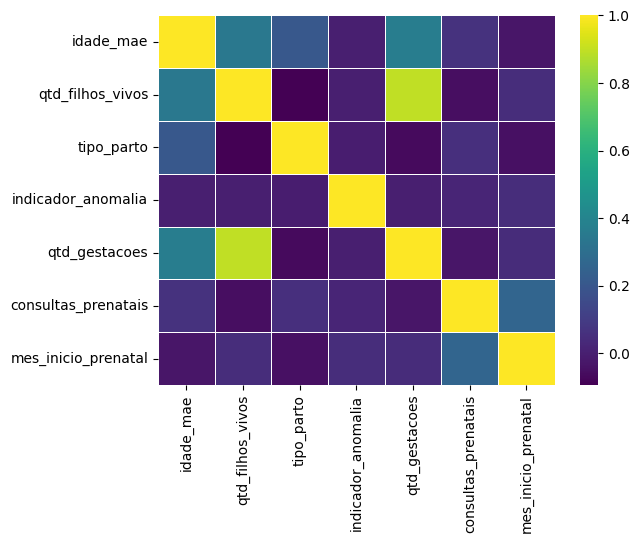

In [ ]:
#O índice de Apgar é um sistema de pontuação de 0 a 10 usado para avaliar rapidamente a condição de um recém-nascido logo após o nascimento.
#Grau de importância de cada feature em relação ao Apgar no 1º minuto
# Criamos uma instância do elemento árvore
tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)

#Treinamento da árvore de 2020
tree_trained1 = tree.fit(feat_train1, targ_train1)
targ_predicted1 = tree_trained1.predict(feat_test1)


#Visualizar gráfico
heatmap(features2020.corr(method='pearson'), cmap='viridis', linewidths=.5)

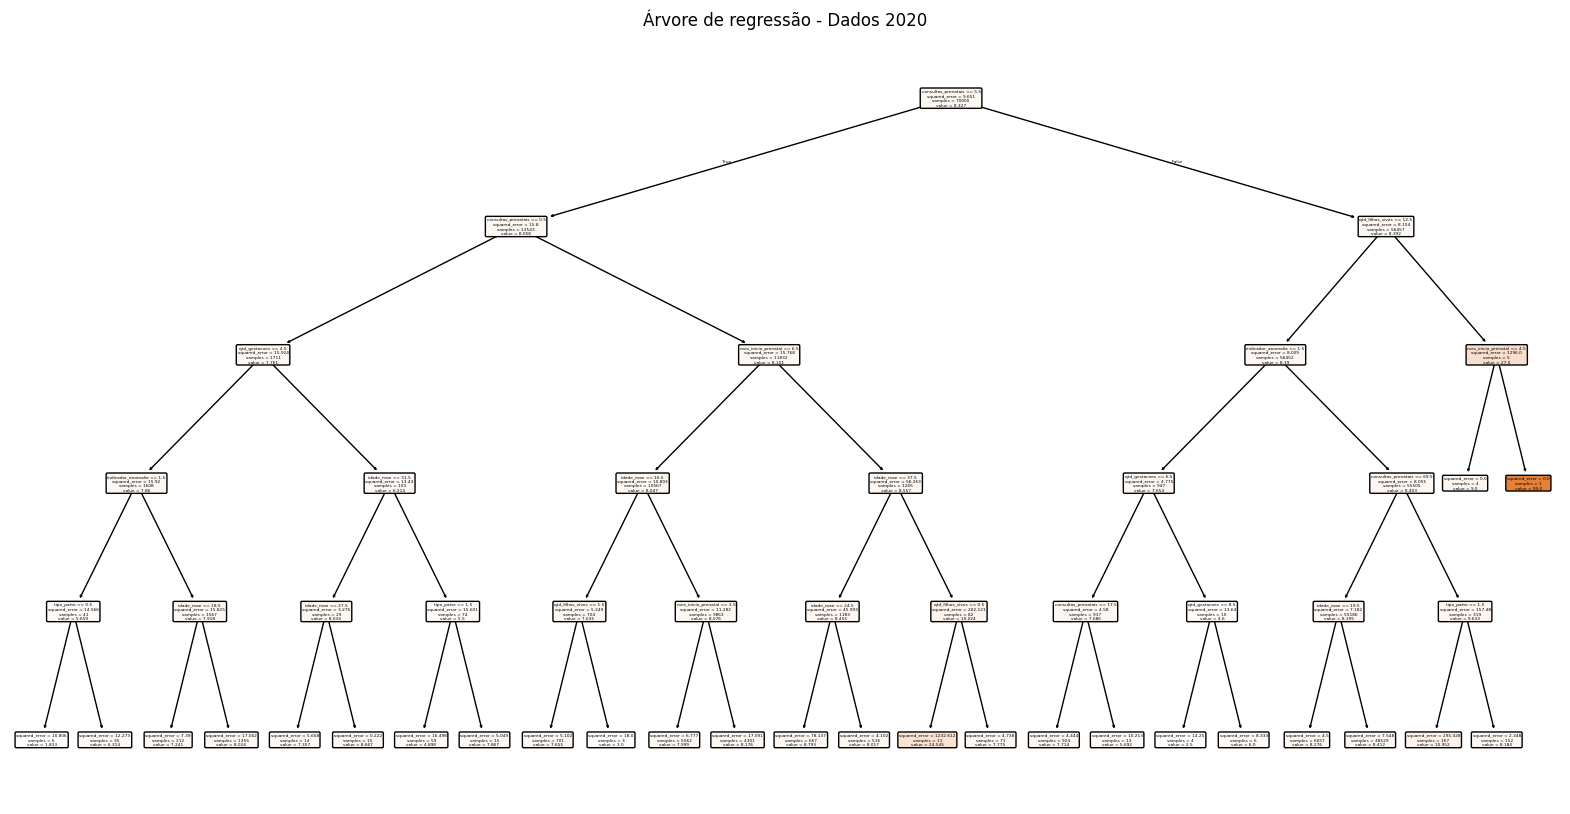

In [ ]:
# Plotando a árvore de regressão
pyplot.figure(figsize=(20,10))
# Convert target_combinado.unique() to a list of strings
class_names = [str(x) for x in target2020.unique()]
plot_tree(tree_trained1,
          feature_names=feat_train1.columns,
          class_names=class_names, # Pass the list of strings
          filled=True,
          rounded=True)
pyplot.title("Árvore de regressão - Dados 2020")
pyplot.show()

In [ ]:
# Avaliação do modelo
mae = mean_absolute_error(targ_test1, targ_predicted1)
mse = mean_squared_error(targ_test1, targ_predicted1)
r2 = r2_score(targ_test1, targ_predicted1)

print(f"Erro Absoluto Médio (MAE): {mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Absoluto Médio (MAE): 0.8104
Erro Quadrático Médio (MSE): 6.2643
Coeficiente de Determinação (R²): -0.0194


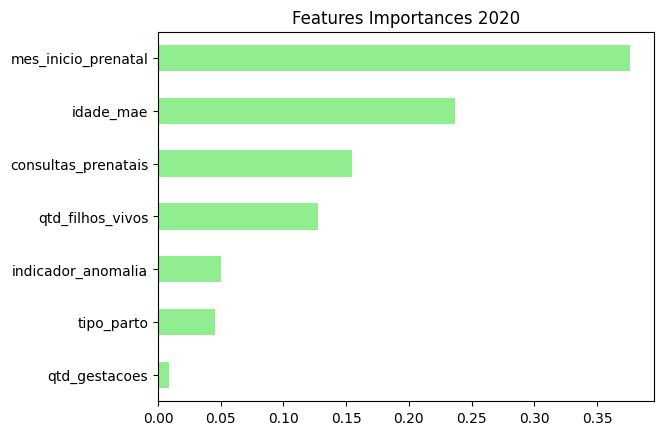

In [ ]:
importances2020 = pd.Series(data=tree_trained1.feature_importances_, index = feat_train1.columns)
importances_sorted2020 = importances2020.sort_values()

# Apresentação do grau de importância em um gráfico
importances_sorted2020.plot(kind='barh', color='lightgreen')
pyplot.title('Features Importances 2020')
pyplot.show()
#Descrever melhor o índice de Apgar para leitura do gráfico

In [ ]:
#@title 2ª Passo para árvore de regressão
#Avaliação das correlações entre as features combinadas
# Suponha que dados_2020 e dados_2023 sejam os DataFrames originais
dados2020["ano"] = 2020
dados2023["ano"] = 2023

# Realizar a junção (merge) dos dois datasets
dados_combinados = pd.concat([dados2020, dados2023], axis=0)

dados_combinados

,codigo_municipio_nascimento,local_nascimento,idade_mae,qtd_filhos_vivos,qtd_filhos_mortos,tempo_gestacao,tipo_gravidez,tipo_parto,data_nascimento,apgar_5_minuto,indicador_anomalia,qtd_gestacoes,qtd_partos_normais,qtd_partos_cesarea,consultas_prenatais,mes_inicio_prenatal,cesarea_eletiva,paridade,ano
0,140010,1,30.0,0.0,0.0,5.0,1.0,1.0,3112020,10.0,2.0,0.0,0.0,0.0,10.0,0.0,3.0,0,2020
1,140010,1,19.0,1.0,0.0,5.0,1.0,1.0,13072020,10.0,2.0,1.0,0.0,1.0,8.0,2.0,3.0,1,2020
2,354020,1,33.0,1.0,1.0,5.0,1.0,2.0,4022020,10.0,2.0,2.0,0.0,1.0,10.0,3.0,1.0,1,2020
3,231340,1,23.0,3.0,1.0,4.0,1.0,1.0,15082020,10.0,2.0,4.0,4.0,0.0,5.0,2.0,3.0,1,2020
4,410690,1,38.0,4.0,0.0,3.0,2.0,1.0,28122020,9.0,2.0,4.0,4.0,0.0,12.0,1.0,3.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,330455,1,19.0,1.0,0.0,5.0,1.0,2.0,10072023,8.0,2.0,1.0,1.0,0.0,8.0,1.0,2.0,1,2023
99996,292740,1,40.0,6.0,1.0,5.0,1.0,2.0,6072023,9.0,2.0,7.0,6.0,0.0,6.0,99.0,2.0,1,2023
99997,261160,1,28.0,2.0,0.0,5.0,1.0,2.0,7102023,9.0,2.0,2.0,1.0,1.0,5.0,99.0,2.0,1,2023
99998,355030,1,30.0,1.0,1.0,5.0,1.0,2.0,21042023,10.0,2.0,2.0,0.0,1.0,5.0,2.0,1.0,1,2023


In [ ]:
# Separar as features e target novamente
features_combinadas = dados_combinados.drop(['codigo_municipio_nascimento', 'data_nascimento', 'local_nascimento', 'tempo_gestacao', 'tipo_gravidez', 'paridade', 'cesarea_eletiva', 'qtd_partos_cesarea', 'qtd_filhos_mortos', 'qtd_partos_normais', 'apgar_5_minuto'], axis = 1)
target_combinado = dados_combinados['apgar_5_minuto']
# Divisão dos dados de treino e teste
feat_train_comb, feat_test_comb, targ_train_comb, targ_test_comb = train_test_split(
    features_combinadas, target_combinado, test_size=0.3, random_state=1
)


<Axes: >

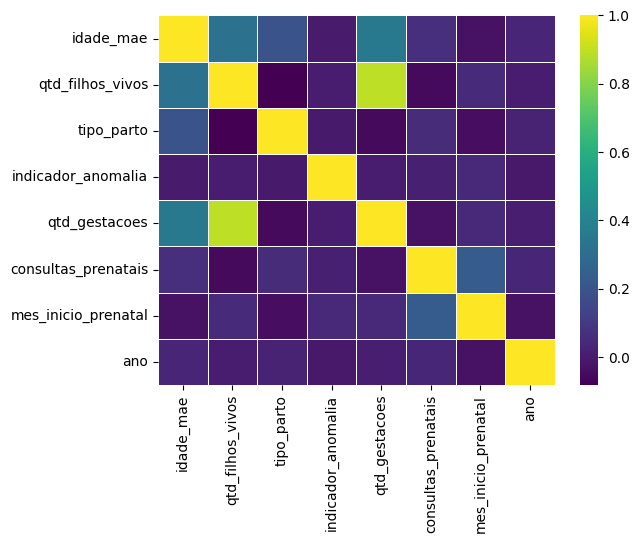

In [ ]:
# Re-treinando a árvore de regressão com os dados combinados
tree_trained_comb = tree.fit(feat_train_comb, targ_train_comb)

# Realizando previsões e avaliando
targ_predicted_comb = tree_trained_comb.predict(feat_test_comb)

#Visualizar gráfico
heatmap(features_combinadas.corr(method='pearson'), cmap='viridis', linewidths=.5)

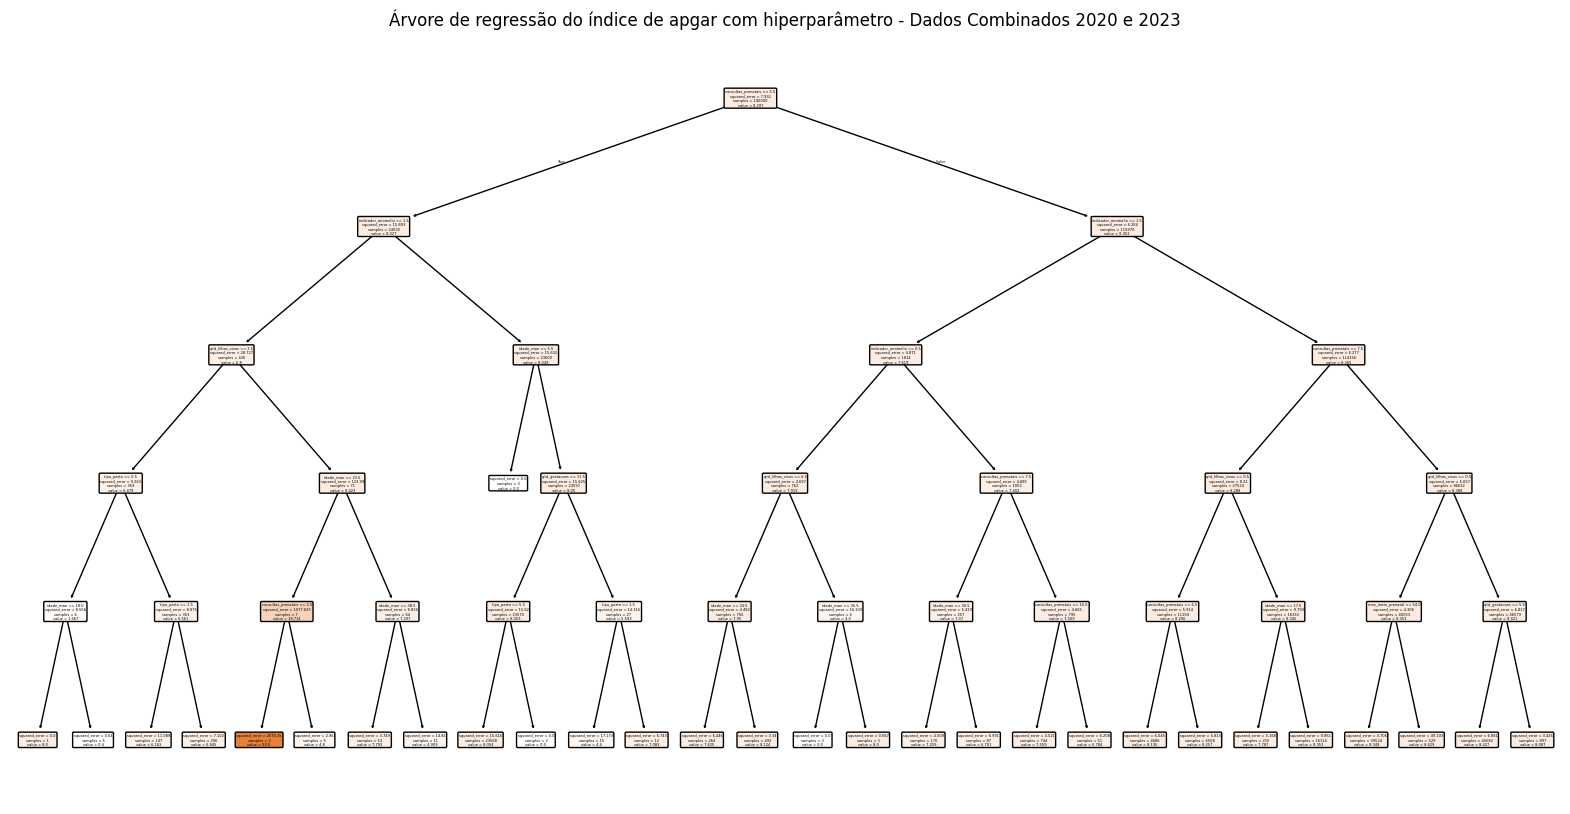

In [ ]:
# Plotando a árvore de regressão
pyplot.figure(figsize=(20,10))
# Convert target_combinado.unique() to a list of strings
class_names = [str(x) for x in target_combinado.unique()]
plot_tree(tree_trained_comb,
          feature_names=feat_train_comb.columns,
          class_names=class_names, # Pass the list of strings
          filled=True,
          rounded=True)
pyplot.title("Árvore de regressão do índice de apgar com hiperparâmetro - Dados Combinados 2020 e 2023")
pyplot.show()

In [ ]:
# Avaliação do modelo
mse_dados = mean_squared_error(targ_test_comb, targ_predicted_comb)
mae_dados = mean_absolute_error(targ_test_comb, targ_predicted_comb)
r2_dados = r2_score(targ_test_comb, targ_predicted_comb)

print(f"Erro Absoluto Médio (MAE): {mae_dados:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_dados:.4f}")
print(f"Coeficiente de Determinação (R²): {r2_dados:.4f}")


Erro Absoluto Médio (MAE): 0.7631
Erro Quadrático Médio (MSE): 5.9221
Coeficiente de Determinação (R²): -0.0035


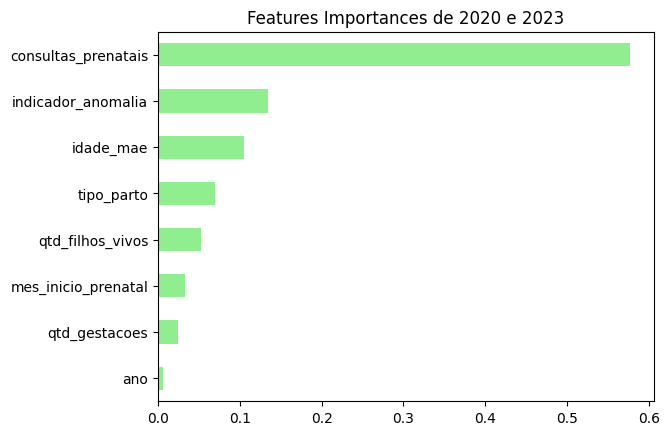

In [ ]:
importances_combinadas = pd.Series(data=tree_trained_comb.feature_importances_, index=features_combinadas.columns)
importances_sorted_comb = importances_combinadas.sort_values()

# Apresentação do grau de importância em um gráfico
importances_sorted_comb.plot(kind='barh', color='lightgreen')
pyplot.title('Features Importances de 2020 e 2023')
pyplot.show()
#Descrever melhor o índice de Apgar para leitura do gráfico

In [ ]:
#@title 1ª Passo para Floresta aleatória
# Criar o modelo de Random Forest
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Treinar o modelo com os dados combinados
forest_model.fit(feat_train_comb, targ_train_comb)

# Fazer previsões no conjunto de teste
target_pred_forest = forest_model.predict(feat_test_comb)

# Avaliar o modelo
mae = mean_absolute_error(targ_test_comb, target_pred_forest)
mse = mean_squared_error(targ_test_comb, target_pred_forest)
r2 = r2_score(targ_test_comb, target_pred_forest)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.7584
Mean Squared Error (MSE): 5.8858
Coeficiente de Determinação (R²): 0.0026


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Criar modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)

# Treinar e avaliar
gb_model.fit(feat_train_comb, targ_train_comb)
target_pred_gb = gb_model.predict(feat_test_comb)

mse_gb = mean_squared_error(targ_test_comb, target_pred_gb)
r2_gb = r2_score(targ_test_comb, target_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb:.4f}, R²: {r2_gb:.4f}")


Gradient Boosting - MSE: 5.9906, R²: -0.0152


In [ ]:
#@title Teste Floresta aleatória
import streamlit as st

# Carregar o modelo previamente treinado
best_model = joblib.load("modelo_apgar.pkl")

st.title("Previsão do Índice de Apgar")

idade_mae = st.slider("Idade da Mãe", 15, 45, 30)
consultas = st.slider("Consultas Pré-Natais", 0, 10, 5)
semanas_gestacao = st.slider("Semanas de Gestação", 22, 42, 38)
qtd_filhos_vivos = st.slider("Quantidade de Filhos Vividos", 0, 10, 2)
qtd_filhos_mortos = st.slider("Quantidade de Filhos Mortos", 0, 5, 1)
qtd_gestacoes = st.slider("Quantidade de Gestações", 0, 10, 2)
tempo_gestacao = st.slider("Tempo de Gestação", 22, 42, 38)


input_data = [[idade_mae, consultas, semanas_gestacao, qtd_filhos_vivos, qtd_filhos_mortos, qtd_gestacoes, tempo_gestacao]]
predict_apgar = best_model.predict(input_data)

st.write(f"Previsão do Índice de Apgar: {predict_apgar[0]:.2f}")


In [ ]:
# @title 1ª Figura: Gráfico de comparação de partos por ano
#Comparação entre quantidade de partos cesários e normais
#Colunas de 2020 e 2023
colunas_comuns = list(set(dados2023.columns) & set(dados2020.columns))

# Concatenar as bases
dados_juntos = pd.concat([dados2023[colunas_comuns], dados2020[colunas_comuns]])

dados2023['Ano'] = 2023
dados2020['Ano'] = 2020

colunas_interesse = ['qtd_partos_normais', 'qtd_partos_cesarea', 'Ano']
dados_juntos = pd.concat([dados2023[colunas_interesse], dados2020[colunas_interesse]])

dados_agrupados = dados_juntos.groupby('Ano').sum().reset_index()


In [ ]:
#Visualizar gráfico de comparação de partos por ano
dados_combinados.set_index('ano').plot(kind='bar', figsize=(10, 6))

pyplot.title('Comparação de Partos por Ano')
pyplot.xlabel('Ano')
pyplot.ylabel('Quantidade de Partos')
pyplot.xticks(rotation=0)
pyplot.show()


In [ ]:
# @title 2ª Figura: Comparação de Filhos Vivos e Mortos por Ano
#Comparação entre quantidade de nascidos vivos e mortos 2020
colunas_filhos = ['qtd_filhos_vivos', 'qtd_filhos_mortos', 'Ano']
dados_juntos_f = pd.concat([dados2023[colunas_filhos], dados2020[colunas_filhos]])

dados_agrupados_f = dados_juntos_f.groupby('Ano')[['qtd_filhos_vivos', 'qtd_filhos_mortos']].sum().reset_index()

In [ ]:
# Criando gráfico de barras
dados_combinados.set_index('Ano').plot(kind='bar', figsize=(10, 6))

pyplot.title('Comparação de Filhos Vivos e Mortos por Ano')
pyplot.xlabel('Ano')
pyplot.ylabel('Quantidade')
pyplot.xticks(rotation=0)
pyplot.show()

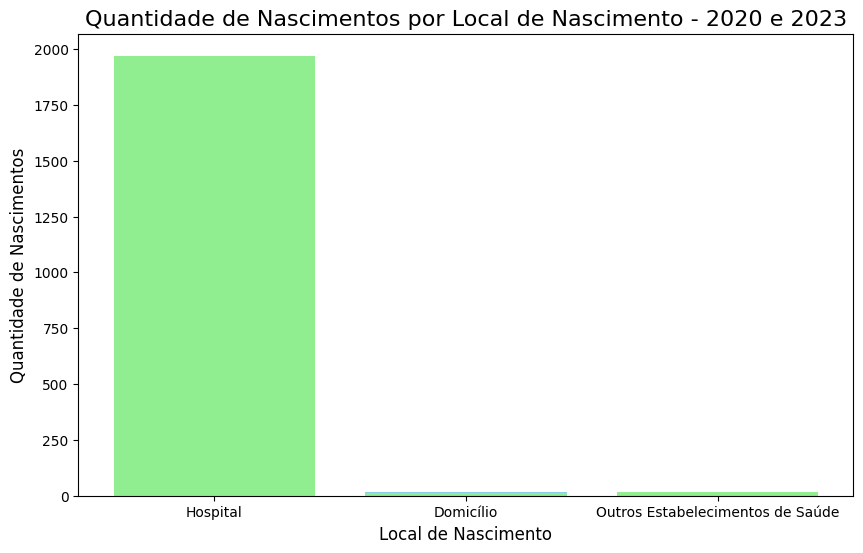

In [ ]:
# @title 3ª Figura: Quantidade de Nascimentos por Local de Nascimento - 2020 e 2023
dados_locais_2020 = {
    'Hospital': Qtd_local_hospital2020,
    'Domicílio': Qtd_local_domicilio2020,
    'Outros Estabelecimentos de Saúde': Qtd_local_outros_est2020,
}
dados_locais_2023 = {
    'Hospital': Qtd_local_hospital2023,
    'Domicílio': Qtd_local_domicilio2023,
    'Outros Estabelecimentos de Saúde': Qtd_local_outros_est2023,
}

# Criando o gráfico de barras
pyplot.figure(figsize=(10, 6))
pyplot.bar(dados_locais_2020.keys(), dados_locais_2020.values(), color='skyblue', label='2020')
pyplot.bar(dados_locais_2023.keys(), dados_locais_2023.values(), color='lightgreen', label='2023')

# Títulos e rótulos
pyplot.title('Quantidade de Nascimentos por Local de Nascimento - 2020 e 2023', fontsize=16)
pyplot.xlabel('Local de Nascimento', fontsize=12)
pyplot.ylabel('Quantidade de Nascimentos', fontsize=12)

# Exibindo o gráfico
pyplot.show()


In [ ]:
# @title 4ª Figura: Quantidade por tipo de parto - 2020 e 2023
# Código para Proporção de Partos Normais e Cesáreos - 2020 e 2023
# Dados de 2020
totais_partos_2020 = {
    'Partos Normais': dados2020['qtd_partos_normais'].sum(),
    'Partos Cesáreos': dados2020['qtd_partos_cesarea'].sum()
}

# Dados de 2023
totais_partos_2023 = {
    'Partos Normais': dados2023['qtd_partos_normais'].sum(),
    'Partos Cesáreos': dados2023['qtd_partos_cesarea'].sum()
}

# Criando DataFrames e adicionando o ano
df_2020 = pd.DataFrame(list(totais_partos_2020.items()), columns=['Tipo de Parto', 'Quantidade'])
df_2020['Ano'] = '2020'

df_2023 = pd.DataFrame(list(totais_partos_2023.items()), columns=['Tipo de Parto', 'Quantidade'])
df_2023['Ano'] = '2023'

# Combinando os dados
df_combined = pd.concat([df_2020, df_2023], ignore_index=True)

# Criando gráficos de pizza lado a lado
fig = px.pie(
    df_combined,
    names='Tipo de Parto',
    values='Quantidade',
    title='Proporção de Partos Normais e Cesáreos - 2020 e 2023',
    color_discrete_sequence=px.colors.qualitative.Set2,
    facet_col='Ano'  # Dividindo por ano
)

# Configurando os rótulos
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
# @title 5ª Figura: Quantidade de Nascidos Vivos e Mortos por tipo de parto - 2020 e 2023
import pandas as pd
import plotly.express as px

# Dados de 2020
totais_partos_2020 = {
    'Partos Normais - Nascidos Vivos': dados2020[dados2020['tipo_parto'] == 1]['qtd_filhos_vivos'].sum(),
    'Partos Cesáreos - Nascidos Vivos': dados2020[dados2020['tipo_parto'] == 2]['qtd_filhos_vivos'].sum(),
    'Partos Normais - Nascidos Mortos': dados2020[dados2020['tipo_parto'] == 1]['qtd_filhos_mortos'].sum(),
    'Partos Cesáreos - Nascidos Mortos': dados2020[dados2020['tipo_parto'] == 2]['qtd_filhos_mortos'].sum()
}

# Dados de 2023
totais_partos_2023 = {
    'Partos Normais - Nascidos Vivos': dados2023[dados2023['tipo_parto'] == 1]['qtd_filhos_vivos'].sum(),
    'Partos Cesáreos - Nascidos Vivos': dados2023[dados2023['tipo_parto'] == 2]['qtd_filhos_vivos'].sum(),
    'Partos Normais - Nascidos Mortos': dados2023[dados2023['tipo_parto'] == 1]['qtd_filhos_mortos'].sum(),
    'Partos Cesáreos - Nascidos Mortos': dados2023[dados2023['tipo_parto'] == 2]['qtd_filhos_mortos'].sum()
}

# Criando DataFrames e adicionando a coluna do ano
df_2020 = pd.DataFrame(list(totais_partos_2020.items()), columns=['Categoria', 'Quantidade'])
df_2020['Ano'] = '2020'

df_2023 = pd.DataFrame(list(totais_partos_2023.items()), columns=['Categoria', 'Quantidade'])
df_2023['Ano'] = '2023'

# Combinando os dados
df_combined = pd.concat([df_2020, df_2023], ignore_index=True)

# Criando o gráfico de barras horizontais com barras lado a lado
fig = px.bar(
    df_combined,
    x='Quantidade',
    y='Categoria',
    color='Ano',
    orientation='h',  # Barras horizontais
    title='Quantidade de Nascidos Vivos e Mortos por Tipo de Parto - 2020 e 2023',
    text='Quantidade',  # Exibe os valores nas barras
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Ajustando o layout para melhor visualização
fig.update_traces(textposition='outside')
fig.update_layout(barmode='group')  # Barras lado a lado

# Exibindo o gráfico
fig.show()


In [ ]:
df_combined

,Categoria,Quantidade,Ano
0,Partos Normais - Nascidos Vivos,48549.0,2020
1,Partos Cesáreos - Nascidos Vivos,51657.0,2020
2,Partos Normais - Nascidos Mortos,9520.0,2020
3,Partos Cesáreos - Nascidos Mortos,15006.0,2020
4,Partos Normais - Nascidos Vivos,45797.0,2023
5,Partos Cesáreos - Nascidos Vivos,55225.0,2023
6,Partos Normais - Nascidos Mortos,9654.0,2023
7,Partos Cesáreos - Nascidos Mortos,17244.0,2023


In [ ]:
# Iniciar primeira coluna do df_combined em 1 a 8
df_combined = df_combined.drop(columns=)
df_combined

,Categoria,Quantidade,Ano,coluna
0,Partos Normais - Nascidos Vivos,48549.0,2020,1
1,Partos Cesáreos - Nascidos Vivos,51657.0,2020,2
2,Partos Normais - Nascidos Mortos,9520.0,2020,3
3,Partos Cesáreos - Nascidos Mortos,15006.0,2020,4
4,Partos Normais - Nascidos Vivos,45797.0,2023,5
5,Partos Cesáreos - Nascidos Vivos,55225.0,2023,6
6,Partos Normais - Nascidos Mortos,9654.0,2023,7
7,Partos Cesáreos - Nascidos Mortos,17244.0,2023,8


In [ ]:
# Supondo que você tenha um DataFrame com as colunas mencionadas
'''dados_combinados = pd.DataFrame({
    "idade_mae": [18, 22, 25, 30, 34, 40, 19, 21, 28, 35],
    "tipo_parto": [1, 2, 1, 1, 2, 1, 2, 1, 2, 1],  # 1 = Normal, 2 = Cesárea
    "qtd_gestacoes": [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    "qtd_partos_normais": [1, 0, 2, 1, 0, 2, 0, 1, 0, 1],
    "qtd_partos_cesarea": [0, 1, 1, 0, 2, 1, 1, 0, 3, 0]
})'''

# Definir as faixas etárias
bins = [15, 19, 24, 29, 34, 39, 44, 49]
labels = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"]

dados_combinados["faixa_etaria"] = pd.cut(dados_combinados["idade_mae"], bins=bins, labels=labels, right=True)


In [ ]:
# Contar partos normais e cesáreas por faixa etária
grupo_partos = dados_combinados.groupby("faixa_etaria").agg(
    total_partos=("tipo_parto", "count"),
    partos_cesareas=("qtd_partos_cesarea", "sum"),
    partos_normais=("qtd_partos_normais", "sum")
)

# Calcular a taxa de cesárea
grupo_partos["taxa_cesarea"] = (grupo_partos["partos_cesareas"] / grupo_partos["total_partos"]) * 100

# Exibir o resultado
print(grupo_partos)


              total_partos  partos_cesareas  partos_normais  taxa_cesarea
faixa_etaria                                                             
15-19                22435           2227.0          4145.0      9.926454
20-24                48414          12244.0         21789.0     25.290205
25-29                49859          20738.0         33426.0     41.593293
30-34                41658          21234.0         33471.0     50.972202
35-39                26456          15821.0         25737.0     59.801179
40-44                 7464           4858.0          9969.0     65.085745
45-49                  432            241.0           727.0     55.787037


<ipython-input-40-c04706091b45>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_partos = dados_combinados.groupby("faixa_etaria").agg(


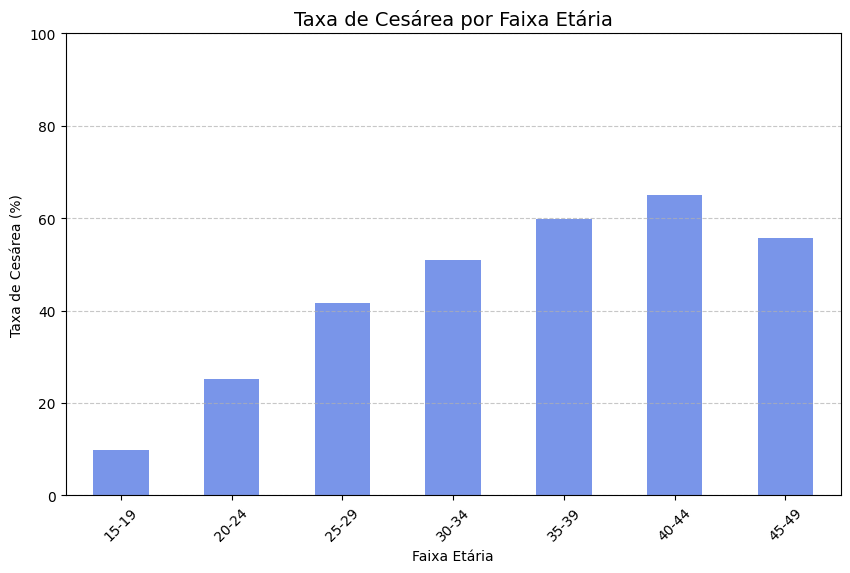

In [ ]:
# Criar gráfico de barras
pyplot.figure(figsize=(10, 6))
grupo_partos["taxa_cesarea"].plot(kind="bar", color="royalblue", alpha=0.7)

# Configurações do gráfico
pyplot.title("Taxa de Cesárea por Faixa Etária", fontsize=14)
pyplot.ylabel("Taxa de Cesárea (%)")
pyplot.xlabel("Faixa Etária")
pyplot.ylim(0, 100)
pyplot.xticks(rotation=45)
pyplot.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
pyplot.show()


In [ ]:
# Salvar o DataFrame com as taxas de cesárea
grupo_partos.to_csv("taxa_cesarea.csv", index=True, encoding="utf-8")

In [ ]:
# Salvar o DataFrame com os dados combinados
df_combined.to_csv("dados_nascidos.csv", index=True, encoding="utf-8")

<ipython-input-35-8572761ac9e4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')


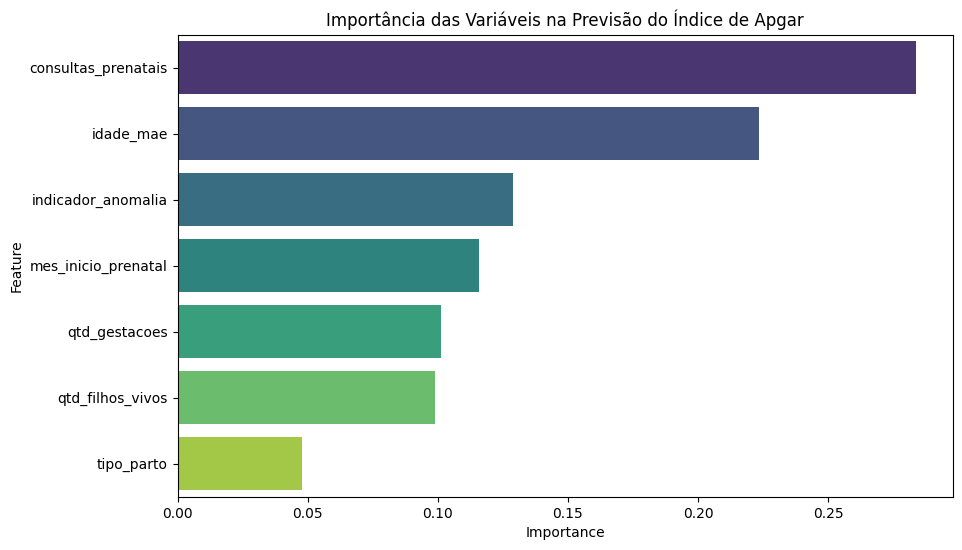

In [ ]:
# @title 6ª Figura: Importância das Variáveis na Previsão do Índice de Apgar
import seaborn as sns

# Obter a importância das features
importances = forest_model.feature_importances_
feat_importances = pd.DataFrame({'Feature': feat_train_comb.columns, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plotar a importância das features
pyplot.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
pyplot.title("Importância das Variáveis na Previsão do Índice de Apgar")
pyplot.show()


## <font color=green size=6>**Esclarecimentos e Requisitos do projeto**</font>

1. Este projeto precisa começar pela definição de um tema. Por exemplo: arboviroses no Brasil.


2. A partir do tema, a equipe deve identificar um banco de dados ou dataset, preferencialmente, utilizando dados reais.


3. Com base na relação entre o tema e os dados identificados, a equipe deve identificar um problema a ser solucionado. Por exemplo: identificar as principais condutas das pessoas que podem prevenir a piora de um quadro de arbovirose. É preciso que esse problema seja passível de solução por meio do banco de dados escolhido pela equipe.


4. A equipe deve pré-processar o banco de dados identificado.
- 4.1. Provavelmente, nem todas as colunas (variáveis / features) presentes no banco serão necessárias para a solução do problema que a equipe escolheu para lidar.
- 4.2. Da mesma forma, nem todas as linhas do banco (relacionadas a dados como os de participantes de uma pesquisa) podem ser necessárias. Por exemplo: algumas linhas podem ter muitos dados nulos, que pode ser útil simplesmente excluir. Outro exemplo: o estudo que a equipe escolheu envolve apenas a saúde da mulher, permitindo a exclusão dos dados dos homens.
- 4.3. Por fim, é possível que existam dados inconsistentes e que precisam ser corrigidos ou dados com texto e que devem ser transformados em números, se o que se espera é que sejam processados estatisticamente.


5. Com o banco de dados em condições de processamento, é necessário conduzir uma Análise Exploratória de Dados. Isso significa utilizar bibliotecas do python que permitiu calcular estatísticas descritivas.
- 5.1. Considere as seguintes estatísticas: medidas de tendência central (ex.: média), medidas de dispersão (ex.: desvio-padrão), medidas de contagem e proporção (ex.: frequência, percentual), medidas de associação (ex.: correlação de pearson).
- 5.2. Considere os seguintes gráficos: histograma, gráfico de barras, boxplot.
- 5.3. Você deve apresentar neste notebook 05 estatísticas descritivas e 05 gráficos relacionados ao banco de dados pré-processado e que ajudem a caracterizar os seus dados, te aproximando da solução do problema que a equipe selecionou.


6. Esta entrega deve ocorrer até o dia 12/12/2024.

*A título de informação, lembramos que a 2ª entrega deste projeto será um modelo de IA, que ajude a solucionar o problema que a equipe escolheu e a última entrega será um dashboard unindo as estatísticas da 1ª entrega com o modelo da 2ª entrega.*